# Bike Sharing Assignment

## Data Preparation and Modelling

### Import Libraries

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [15]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Convert categorical variables to string

In [20]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})

### Testing the Converted string

In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Convert categorical variables to dummy variables

In [30]:
df = pd.get_dummies(df, columns=['season', 'weathersit', 'yr'], drop_first=True)

### Handle missing values if any

In [43]:
df = df.dropna()

### Split data into features and target

In [46]:
X = df.drop(['cnt', 'dteday', 'instant'], axis=1)  # Drop 'cnt' as it's the target and 'dteday' as it's a datetime
y = df['cnt']

### Split the data into training and testing sets (80% train, 20% test)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Linear Regression Model

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Print the coefficients of the model

In [71]:
print("Coefficients:", lr.coef_)

Coefficients: [-5.60262751e-14 -1.85256264e-12  7.00618347e-14 -1.25982718e-12
 -1.66384053e-13  1.81969077e-13 -7.12682026e-15 -2.06306770e-14
  1.00000000e+00  1.00000000e+00 -8.57785832e-14 -1.74243445e-14
 -2.89311553e-13  9.54105814e-13 -2.23363749e-13  6.27581273e-14]


### Print the intercept of the model

In [76]:
print("Intercept:", lr.intercept_)

Intercept: 2.7284841053187847e-12


### Evaluates the R-squared value on the training data.

In [81]:
print("R-squared:", lr.score(X_train, y_train))

R-squared: 1.0


### Make predictions on the test set

In [57]:
y_pred = lr.predict(X_test)

### Evaluates the R-squared value on the test data

In [62]:
print("R-squared Score:", r2_score(y_test, y_pred))

R-squared Score: 1.0


### Residual Analysis

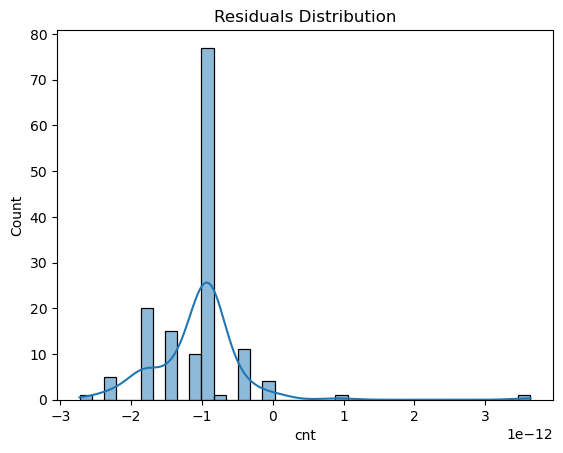

In [65]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

### Scatter plot of Residuals vs Predicted Values

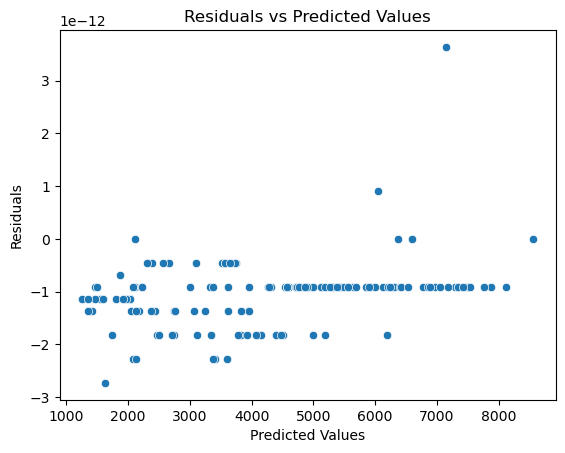

In [67]:
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Ridge Regression

In [88]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("R-squared (test set) for Ridge:", r2_score(y_test, y_pred_ridge))

R-squared (test set) for Ridge: 1.0


### Lasso Regression

In [93]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("R-squared (test set) for Lasso:", r2_score(y_test, y_pred_lasso))

R-squared (test set) for Lasso: 0.9999999999999567
